In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

import torchvision.transforms as transforms

In [2]:
orig_wm = []
ours_wm = []
naive_wm = []
naive_ed_wm = []

for i in range(3):
    orig_pt = "orig_wm_cut_" + str(i) + ".pt"
    ours_pt = "ours_reversed_wm_cut_" + str(i) + ".pt"
    naive_pt = "naive_reversed_wm_cut_" + str(i) + ".pt"
    naive_ed_pt = "naive_reversed_wm_cut_with_ed_" + str(i) + ".pt"
    orig = torch.load(orig_pt)
    ours = torch.load(ours_pt)
    naive = torch.load(naive_pt)
    naive_ed = torch.load(naive_ed_pt)
    orig_wm.append(orig.cpu()[22:41, 23:42])
    ours_wm.append(ours.cpu()[22:41, 23:42])
    naive_wm.append(naive.cpu()[22:41, 23:42])
    naive_ed_wm.append(naive_ed.cpu()[22:41, 23:42])

a = []
b = []
bb = []
c = []

for user in range(3):
    global_max = torch.max(torch.abs(torch.cat( (orig_wm[user], ours_wm[user], naive_wm[user], naive_ed_wm[user]),dim=0)))
    print(global_max)
    a.append(orig_wm[user] / global_max)
    b.append(naive_wm[user] / global_max)
    bb.append(naive_ed_wm[user] / global_max)
    c.append(ours_wm[user] / global_max)
    print(a[-1].shape)

tensor(167.5366)
torch.Size([19, 19])
tensor(139.2944)
torch.Size([19, 19])
tensor(151.2215)
torch.Size([19, 19])


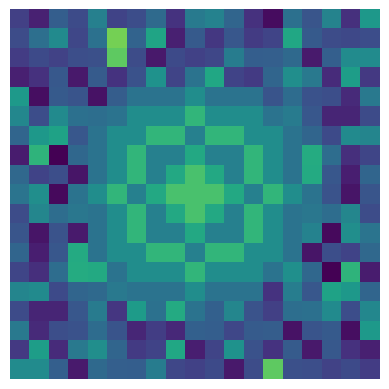

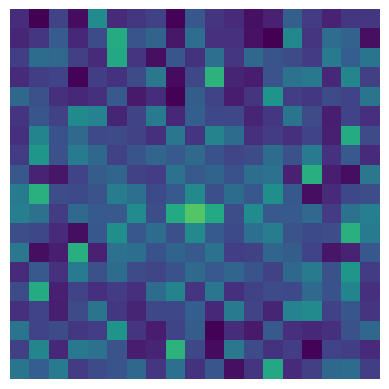

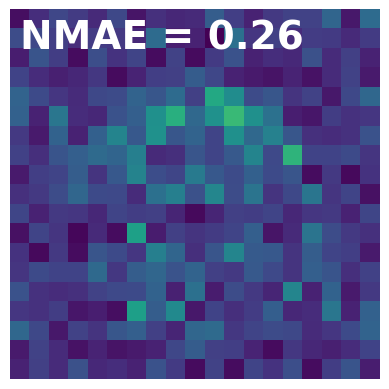

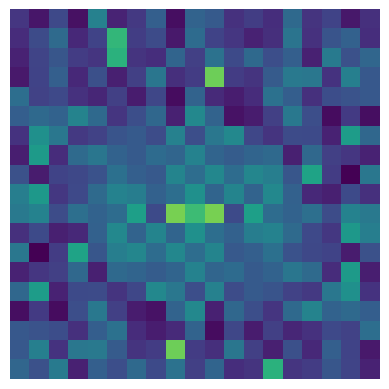

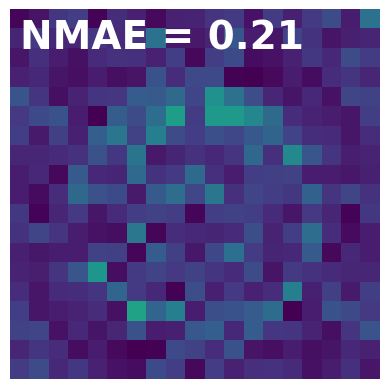

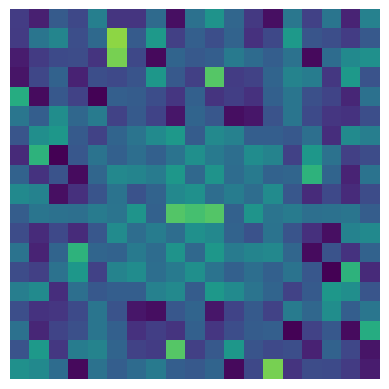

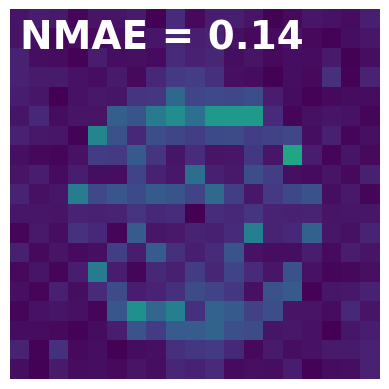

In [5]:
user = 2

VMAX=1.2
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 부호 기호 미표시
matplotlib.rcParams['axes.spines.top'] = False  # 윗면 범위 없음
matplotlib.rcParams['axes.spines.right'] = False  # 오른쪽 범위 없음
matplotlib.rcParams['axes.spines.bottom'] = False  # 아랫면 범위 없음
matplotlib.rcParams['axes.spines.left'] = False  # 왼쪽 범위 없음

plt.figure()
plt.imshow(torch.abs(a[user]),vmax=VMAX)
plt.axis('off')
plt.savefig('original_'+str(user)+'.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

plt.figure()
plt.imshow(torch.abs(b[user]),vmax=VMAX)
plt.axis('off')
plt.savefig('naive_'+str(user)+'.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

plt.figure()
plt.imshow(torch.abs(a[user]-b[user]),vmax=VMAX)
#print("l1 diff: ", torch.sum(torch.abs(a[user]-b[user])))
plt.text(0, 0, "NMAE = {:.2f}".format((torch.mean(torch.abs(a[user]-b[user]))/(torch.max(torch.abs(a[user]))-torch.min(torch.abs(a[user])))).item()), color='white', fontsize=28, ha='left', va='top',fontweight='bold')
plt.axis('off')
plt.savefig('err_naive_'+str(user)+'.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

plt.figure()
plt.imshow(torch.abs(bb[user]),vmax=VMAX)
plt.axis('off')
plt.savefig('naive_ed_'+str(user)+'.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

plt.figure()
plt.imshow(torch.abs(a[user]-bb[user]),vmax=VMAX)
#print("l1 diff: ", torch.sum(torch.abs(a[user]-b[user])))
plt.text(0, 0, "NMAE = {:.2f}".format((torch.mean(torch.abs(a[user]-bb[user]))/(torch.max(torch.abs(a[user]))-torch.min(torch.abs(a[user])))).item()), color='white', fontsize=28, ha='left', va='top',fontweight='bold')
plt.axis('off')
plt.savefig('err_naive_ed_'+str(user)+'.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

plt.figure()
plt.imshow(torch.abs(c[user]),vmax=VMAX)
plt.axis('off')
plt.savefig('alg2_'+str(user)+'.pdf', format='pdf',bbox_inches='tight', pad_inches=0)

plt.figure()
plt.imshow(torch.abs(a[user]-c[user]),vmax=VMAX)
plt.axis('off')
plt.text(0, 0, "NMAE = {:.2f}".format((torch.mean(torch.abs(a[user]-c[user]))/(torch.max(torch.abs(a[user]))-torch.min(torch.abs(a[user])))).item()), color='white', fontsize=28, ha='left', va='top',fontweight='bold')
plt.savefig('err_alg2_'+str(user)+'.pdf', format='pdf',bbox_inches='tight', pad_inches=0)